In [1]:
import math
from tensorboardX import SummaryWriter
sess = None

In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v2), EnvSpec(BipedalWalkerHardcore-v2), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v2), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(Hopper-v2), EnvSpec(Swimmer-v2), EnvSpec(Walker2d-v2), EnvSpec(Ant-v2), EnvSpec(Hum

4
WARN: <class 'wrappers.AtariResetLive'> doesn't implement 'reset' method, which is required for wrappers derived directly from Wrapper. Deprecated default implementation is used.
done


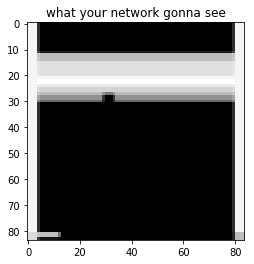

In [4]:
from wrappers import make_env
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
env_name1 = "Pong-v0"
env_name = "BreakoutDeterministic-v4"
env = make_env(env_name)
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(n_actions)
obs = env.reset()
obs, r, done, _ = env.step(2)
#print(obs.shape)
#print(is_done)
done = False
for _ in range(2000):
    obs, _, done, _ = env.step(3)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
plt.imshow(obs[0,:,:],interpolation='none',cmap='gray');

In [5]:

from dqnagent import DQNAgent
from dqnagent import ExperienceBuffer
EXP_BUFFER_CAPACITY = 100000

#agent.epsilon = 0.5

dqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-3,
    'STEPS_PER_EPOCH' : 10,
    'BATCH_SIZE' : 128,
    'EPSILON' : 0.99,
    'MIN_EPSILON' : 0.02,
    'NUM_EPOCHS' : 9*10**5,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'EPS_DECAY_RATE' : 0.99,
    'NAME' : 'DDDQN',
    'IS_DOUBLE' : True,
    'IS_DUELING' : True,
    'DUELING_TYPE' : 'AVERAGE'
    }
ddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-3,
    'STEPS_PER_EPOCH' : 5,
    'BATCH_SIZE' : 64,
    'EPSILON' : 0.5,
    'MIN_EPSILON' : 0.02,
    'NUM_EPOCHS' : 10**5,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'EPS_DECAY_RATE' : 0.99,
    'NAME' : 'DDQN',
    'IS_DOUBLE' : True,
    'IS_DUELING' : True,
    'DUELING_TYPE' : 'AVERAGE'
    }
agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)
agent.restore('nn/DDDQNBreakoutDeterministic-v4')
agent.epsilon = 0.02

INFO:tensorflow:Restoring parameters from nn/DDDQNBreakoutDeterministic-v4


In [6]:
env.reset()
agent.train()

0
saving next best rewards:  80.3333333333
80.3333333333
561.333333333
100
56.6666666667
706.0
200
36.3333333333
523.666666667
300
26.6666666667
492.666666667
400
11.0
422.0
500
9.66666666667
355.0
600
16.3333333333
387.0
700
6.66666666667
255.666666667
800
11.0
419.0
900
6.66666666667
256.333333333
1000
9.33333333333
346.0
1100
17.3333333333
473.0
1200
8.33333333333
329.333333333
1300
1.0
70.0
1400
3.66666666667
131.0
1500
3.66666666667
140.666666667
1600
5.33333333333
212.0
1700
1.0
70.0
1800
5.0
145.333333333
1900
6.33333333333
148.666666667
2000
4.0
151.666666667
2100
saving next best rewards:  126.0
126.0
578.666666667
2200
1.0
70.0
2300
3.66666666667
125.0
2400
6.33333333333
218.0
2500
1.0
71.0
2600
7.0
209.0
2700
4.0
159.666666667
2800
6.66666666667
220.333333333
2900
7.33333333333
242.0
3000
8.0
221.666666667
3100
7.0
188.666666667
3200
7.0
265.666666667
3300
9.0
327.0
3400
5.0
174.666666667
3500
saving next best rewards:  142.666666667
142.666666667
759.0
3600
7.33333333333
21

KeyboardInterrupt: 

In [6]:
#agent.epsilon = 0.2
#agent.train()
import wrappers

In [7]:
from wrappers import make_env_with_monitor
print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=10000):
    rewards = []
    print('reset')
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        reward += r
        rewards.append(reward)
        
            
        if done:
            
            break       
        
    return np.mean(rewards)

import gym.wrappers
env_monitor = make_env_with_monitor(env_name, 'video_dddqn')
sessions = [evaluate(env_monitor) for _ in range(5)]
env_monitor.close()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']
reset
reset
reset
reset
reset


In [ ]:
#tf.reset_default_graph()
#agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [ ]:
#env.reset()
#agent.train()